# Zarr creation using centre positions for multiSEM

**NOTE**: I am trusting on the stitching parameters given by the adquisition software. This notebook only takes care of creating the last zarr for which I have to fuse the tiles.

# Single hexagon

## Loading centre position metadata from CVS file using pandas

In [1]:
import multisemzarr as msz

import pandas as pd
from pathlib import Path
import numpy as np
import skimage.io as skio
#from tqdm.notebook import tqdm

In [4]:
dataset_path = Path('/PROJECTS/CCI/BRAIN/Multibeam/Test_20Sections_20230217_15-17-11/Test_20Sections_20230217_15-17-11/')

id = '024'
region = 'Region4'
section = id + '_' + region

section_path = dataset_path.joinpath(section)

csv_p = section_path.joinpath(region + "_stitched_imagepositions.txt")

image_positions = msz.read_stitched_imagepositions(csv_p)
image_positions

,relative_path,centre_y,centre_x,centre_z
0,000001\024_000001_085_2023-02-17T2350316113584...,-1815970.552,4014112.058,0
1,000001\024_000001_086_2023-02-17T2350316113584...,-1812977.261,4014110.540,0
2,000001\024_000001_084_2023-02-17T2350316113584...,-1818962.158,4014109.279,0
3,000001\024_000001_087_2023-02-17T2350316113584...,-1809983.511,4014107.071,0
4,000001\024_000001_083_2023-02-17T2350316113584...,-1821954.781,4014103.872,0
...,...,...,...,...
7275,000080\024_000080_068_2023-02-18T0011003231317...,-1609424.302,4201099.386,0
7276,000080\024_000080_069_2023-02-18T0011002016915...,-1612439.313,4201093.440,0
7277,000080\024_000080_070_2023-02-18T0011002016915...,-1615453.153,4201084.193,0
7278,000080\024_000080_071_2023-02-18T0011002016915...,-1618468.307,4201073.817,0


We get information of each tile based on the naming convention of multiSEM

In [5]:
image_positions = msz.get_info_from_path(image_positions, section_path=section_path)

image_positions.sample(5)

,relative_path,centre_y,centre_x,centre_z,abs_path,bmp,id,hexagon,tile_number
2481,000028\024_000028_017_2023-02-18T0003335434215...,-1747864.297,4050602.195,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000028_017_2023-02-18T0003335434215.bmp,024,000028,017
5035,000056\024_000056_019_2023-02-18T0010503706314...,-1674119.050,4091844.543,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000056_019_2023-02-18T0010503706314.bmp,024,000056,019
2373,000027\024_000027_058_2023-02-17T2357170269091...,-1740529.649,4028818.702,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000027_058_2023-02-17T2357170269091.bmp,024,000027,058
6830,000076\024_000076_082_2023-02-18T0010018621322...,-1641539.739,4158491.431,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000076_082_2023-02-18T0010018621322.bmp,024,000076,082
281,000004\024_000004_058_2023-02-17T2351169598127...,-1816018.287,4092323.974,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000004_058_2023-02-17T2351169598127.bmp,024,000004,058


I assume that al tiles have same size

In [6]:
# we fill tile dimentions and positions based on first tile, we assume all othes have same size
image_positions = msz.get_info_from_image(image_positions)
# trasnlating to 0,0
image_positions = msz.translation00(image_positions)

image_positions.sample(5)

'.bmp' img_tile size: 2800, 3200, and dtype: uint8


,relative_path,centre_y,centre_x,centre_z,abs_path,bmp,id,hexagon,tile_number,size_x,size_y,corner_x,corner_y
3140,000035\024_000035_005_2023-02-17T2359215677270...,120925.605,26638.076,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000035_005_2023-02-17T2359215677270.bmp,024,000035,005,2800,3200,25238,119326
4471,000050\024_000050_081_2023-02-18T0003159204237...,130744.283,186028.999,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000050_081_2023-02-18T0003159204237.bmp,024,000050,081,2800,3200,184628,129145
4795,000053\024_000053_022_2023-02-18T0004006203417...,177609.675,23969.808,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000053_022_2023-02-18T0004006203417.bmp,024,000053,022,2800,3200,22569,176010
2659,000030\024_000030_080_2023-02-17T2358040876423...,84443.617,127140.937,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000030_080_2023-02-17T2358040876423.bmp,024,000030,080,2800,3200,125740,82844
5621,000062\024_000062_041_2023-02-18T0006217402343...,203548.606,9199.008,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000062_041_2023-02-18T0006217402343.bmp,024,000062,041,2800,3200,7799,201949


## intensity corrections

In [7]:
testing = False
if testing:

    # this is for testing
    hex_pos = image_positions[image_positions["hexagon"].isin(['000011', 
                                                                '000012',
                                                                '000013',
                                                                '000014',
                                                                '000015' ])].copy()
    
    hex_pos.reset_index(inplace=True)
else:
    # this is for full image
    hex_pos = image_positions.copy()
hex_pos

,relative_path,centre_y,centre_x,centre_z,abs_path,bmp,id,hexagon,tile_number,size_x,size_y,corner_x,corner_y
0,000001\024_000001_085_2023-02-17T2350316113584...,29880.448,34561.058,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000001_085_2023-02-17T2350316113584.bmp,024,000001,085,2800,3200,33161,28281
1,000001\024_000001_086_2023-02-17T2350316113584...,32873.739,34559.540,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000001_086_2023-02-17T2350316113584.bmp,024,000001,086,2800,3200,33159,31274
2,000001\024_000001_084_2023-02-17T2350316113584...,26888.842,34558.279,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000001_084_2023-02-17T2350316113584.bmp,024,000001,084,2800,3200,33158,25289
3,000001\024_000001_087_2023-02-17T2350316113584...,35867.489,34556.071,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000001_087_2023-02-17T2350316113584.bmp,024,000001,087,2800,3200,33156,34268
4,000001\024_000001_083_2023-02-17T2350316113584...,23896.219,34552.872,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000001_083_2023-02-17T2350316113584.bmp,024,000001,083,2800,3200,33152,22297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275,000080\024_000080_068_2023-02-18T0011003231317...,236426.698,221548.386,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000080_068_2023-02-18T0011003231317.bmp,024,000080,068,2800,3200,220148,234827
7276,000080\024_000080_069_2023-02-18T0011002016915...,233411.687,221542.440,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000080_069_2023-02-18T0011002016915.bmp,024,000080,069,2800,3200,220142,231812
7277,000080\024_000080_070_2023-02-18T0011002016915...,230397.847,221533.193,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000080_070_2023-02-18T0011002016915.bmp,024,000080,070,2800,3200,220133,228798
7278,000080\024_000080_071_2023-02-18T0011002016915...,227382.693,221522.817,0,\PROJECTS\CCI\BRAIN\Multibeam\Test_20Sections_...,024_000080_071_2023-02-18T0011002016915.bmp,024,000080,071,2800,3200,220122,225783


In [8]:
hex_pos = msz.get_intensity_correction(hex_pos, method='q30')

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


target median: 78.0


## Check size of array 
This is to make it compatible with downscaling later own

In [9]:
hex_pos = msz.translation00(hex_pos)

x_size_tmp = (hex_pos['corner_x']+hex_pos["size_x"]).max()
total_x = int(msz.optimal_size(x_size_tmp, 5))

y_size_tmp = (hex_pos['corner_y']+hex_pos["size_y"]).max()
total_y = int(msz.optimal_size(y_size_tmp, 5))

current size: 261002, factor: 32, reminder: 10
we need to add: 22, so new size is: 261024
current size: 248548, factor: 32, reminder: 4
we need to add: 28, so new size is: 248576


In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

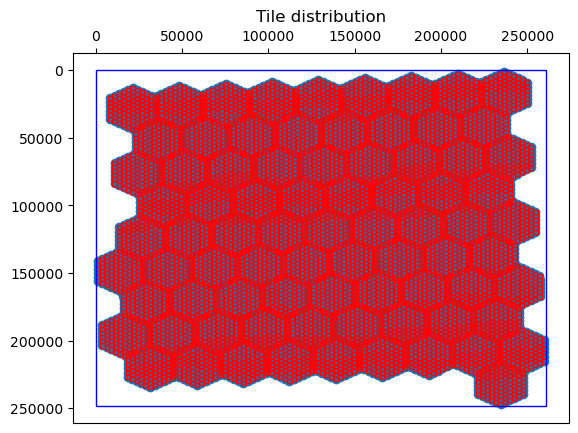

In [11]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.scatter(hex_pos["centre_x"].to_numpy(), hex_pos["centre_y"].to_numpy())

#add rectangle to plot
for index, row in hex_pos.iterrows():
    c_x = row["corner_x"]
    c_y = row["corner_y"]
    
    ax.add_patch(Rectangle((c_x, c_y), row["size_x"], row["size_y"],
             edgecolor = 'red',
             fill=False))

ax.add_patch(Rectangle((0, 0), total_x, total_y,
             edgecolor = 'blue',
             fill=False))

# axis as in image
ax.set_ylim(ax.get_ylim()[::-1])  
ax.xaxis.tick_top() 
ax.yaxis.tick_left()  

#display plot
plt.title("Tile distribution")
plt.show()

## Init ZARR array

In [12]:
import zarr
import skimage.io as skio

In [13]:
def rm_tree(pth):
    pth = Path(pth)
    for child in pth.glob('*'):
        if child.is_file():
            child.unlink()
        else:
            rm_tree(child)
    pth.rmdir()

In [14]:
z0_str = "./data/"+section+".zarr"
z0_path = Path(z0_str)

if z0_path.exists():
  rm_tree(z0_path)
  
store = zarr.DirectoryStore(z0_path)
img_tile = skio.imread(hex_pos['abs_path'][0])
chunk_size = np.max(img_tile.shape)
print(f'Chunk size: {chunk_size},{chunk_size}')
z = zarr.creation.open_array(store=store, mode='a', shape=(total_y, total_x), chunks=(chunk_size,chunk_size), dtype=img_tile.dtype)
z

Chunk size: 3200,3200


<zarr.core.Array (248576, 261024) uint8>

## Dynamically fill in values

In [15]:
from tqdm.auto import tqdm
from functools import partial
from multiprocess import Pool

In [16]:
def correct_write_tile3(tile_info, zarr_array):
    from skimage.io import imread
    from numpy import multiply, transpose, median
    from multisemzarr import flat_field_correction
    #if type(tile_info) is tuple:
    #    tile_info = tile_info[1]

    tile = imread(tile_info['abs_path'])
    corr_tile = flat_field_correction(tile)

    original_med = tile_info['median_int']
    corr_med = median(corr_tile)

    corr_tile = multiply(corr_tile, original_med/corr_med).astype(tile.dtype)
    
    x1 = tile_info["corner_x"]
    x2 = x1+tile_info["size_x"]
    y1 = tile_info["corner_y"]
    y2 = y1+tile_info["size_y"]

    corr_factor = tile_info['int_corr']

    zarr_array[y1:y2,x1:x2] = multiply(transpose(corr_tile).astype(float), corr_factor).astype(zarr_array.dtype)

def correct_write_tile2(tile_info, zarr_array):
    from skimage.io import imread
    from numpy import multiply, transpose, median
    from skimage.exposure import equalize_adapthist
    #if type(tile_info) is tuple:
    #    tile_info = tile_info[1]

    tile = imread(tile_info['abs_path'])

    original_med = tile_info['median_int']
    img_adapteq = equalize_adapthist(tile, clip_limit=0.00)
    # img_adapteq.shape
    adapted_med = median(img_adapteq)
    img_adapteq = multiply(img_adapteq, original_med/adapted_med).astype(tile.dtype)
    
    x1 = tile_info["corner_x"]
    x2 = x1+tile_info["size_x"]
    y1 = tile_info["corner_y"]
    y2 = y1+tile_info["size_y"]

    corr_factor = tile_info['int_corr']

    zarr_array[y1:y2,x1:x2] = multiply(transpose(img_adapteq).astype(float), corr_factor).astype(zarr_array.dtype)

def correct_write_tile(tile_info, zarr_array):
    from skimage.io import imread
    from numpy import multiply, transpose
    #if type(tile_info) is tuple:
    #    tile_info = tile_info[1]

    tile = imread(tile_info['abs_path'])
    
    x1 = tile_info["corner_x"]
    x2 = x1+tile_info["size_x"]
    y1 = tile_info["corner_y"]
    y2 = y1+tile_info["size_y"]

    corr_factor = tile_info['int_corr']

    zarr_array[y1:y2,x1:x2] = multiply(transpose(tile).astype(float), corr_factor).astype(zarr_array.dtype)

np.unique(hex_pos['tile_number'])
chunks = []
for tn in np.unique(hex_pos['tile_number']):
    tmp = hex_pos[hex_pos['tile_number'].isin([tn])].copy()
    chunks.append(tmp)

print(f'found {len(chunks)} unique tile ids')

for current in tqdm(chunks):
    hex_list = []
    for tile_idx, row in current.iterrows():
        hex_list.append(row) 

    with Pool(20) as pool:
        seq = [row for row in hex_list]
        pool.map(partial(correct_write_tile3, zarr_array=z), seq)
        #pool.imap(partial(correct_write_tile, zarr_array=z), seq)
        #pool.close()
        #pool.join()

    #for row in hex_list:
    #    print(row['int_corr'])
    #    correct_write_tile(zarr_array=z, tile_info=row)



found 91 unique tile ids


  0%|          | 0/91 [00:00<?, ?it/s]

## To open in napari

This image can be now opened in Napari by drag a drop and using ```napari builtins```

## Changing now to ome-zarr

However, I want to add ome-zarr support. For that I need some minimal metadata, and optionally some resolution levels

For downsampling I will use ```dask-array``` as suggested in [this discussion](https://forum.image.sc/t/creating-an-ome-zarr-dynamically-from-tiles-stored-as-a-series-of-images-list-of-centre-positions-using-python/81657/12?u=camachodejay) 

In [17]:
import dask.array as da
# like numpy.mean, but maintains dtype, helper function
def mean_dtype(arr, **kwargs):
    return np.mean(arr, **kwargs).astype(arr.dtype)

In [18]:
# it is still not quite clear to me why, but we need to rechunk de data at this stage
# if not zarr writting later on will fail
d0 = da.from_zarr(store).rechunk(img_tile.shape[1],img_tile.shape[0])
d0

dask.array<from-zarr, shape=(248576, 261024), dtype=uint8, chunksize=(3200, 3200), chunktype=numpy.ndarray>

In [19]:
d1 = da.coarsen(mean_dtype, d0, {0:2,1:2}).rechunk(int(img_tile.shape[1]/2),int(img_tile.shape[0]/2))

d2 = da.coarsen(mean_dtype, d0, {0:4,1:4}).rechunk(int(img_tile.shape[1]/2),int(img_tile.shape[0]/2))

d3 = da.coarsen(mean_dtype, d0, {0:8,1:8}).rechunk(int(img_tile.shape[1]/2),int(img_tile.shape[0]/2))

d4 = da.coarsen(mean_dtype, d0, {0:16,1:16}).rechunk(int(img_tile.shape[1]/2),int(img_tile.shape[0]/2))

d5 = da.coarsen(mean_dtype, d0, {0:32,1:32}).rechunk(int(img_tile.shape[1]/2),int(img_tile.shape[0]/2))
d5

dask.array<rechunk-merge, shape=(7768, 8157), dtype=uint8, chunksize=(1600, 1600), chunktype=numpy.ndarray>

In [20]:
from ome_zarr.io import parse_url
from ome_zarr.writer import write_multiscale
from ome_zarr.writer import write_multiscales_metadata

In [21]:
# I can probably build this programmatically, for the moment I take a shortcut. 
# This assumes an image with full resolution and one downscale by 2x2
initial_pix_size = 4
initial_pix_unit = 'nanometer'
coordtfs = [
        [{'type': 'scale', 'scale': [initial_pix_size,initial_pix_size]},
         {'type': 'translation', 'translation': [0, 0]}],
        [{'type': 'scale', 'scale': [initial_pix_size*2,initial_pix_size*2]},
         {'type': 'translation', 'translation': [0, 0]}],
        [{'type': 'scale', 'scale': [initial_pix_size*4,initial_pix_size*4]},
         {'type': 'translation', 'translation': [0, 0]}],
        [{'type': 'scale', 'scale': [initial_pix_size*8,initial_pix_size*8]},
         {'type': 'translation', 'translation': [0, 0]}],
        [{'type': 'scale', 'scale': [initial_pix_size*16,initial_pix_size*16]},
         {'type': 'translation', 'translation': [0, 0]}],
        [{'type': 'scale', 'scale': [initial_pix_size*32,initial_pix_size*32]},
         {'type': 'translation', 'translation': [0, 0]}],
        ]
axes = [{'name': 'y', 'type': 'space', 'unit': initial_pix_unit},
        {'name': 'x', 'type': 'space', 'unit': initial_pix_unit}]

# Open the zarr group manually
path_str = "./data/"+section+"corr-ome.zarr"
path = Path(path_str)

if path.exists():
  rm_tree(path)

store = parse_url(path, mode='w').store
root = zarr.group(store=store)

# Use OME write multiscale;
write_multiscale([d0, d1, d2, d3, d4, d5],
        group=root, axes=axes, coordinate_transformations=coordtfs
        )
# add omero metadata: the napari ome-zarr plugin uses this to pass rendering
# options to napari.
root.attrs['omero'] = {
        'channels': [{
                'color': 'ffffff',
                'label': region,
                'active': True,
                }]
        }

In [22]:
if z0_path.exists():
  rm_tree(z0_path)